In [11]:
library(here)
source(here("setup.R"))
library(reticulate)

expit <- function(x) {
    1 / (1 + exp(-x))
}
logit <- function(x) {
    log(x / (1 - x))
}
theta_to_params <- function(theta) {
    c(
        "alpha" = expit(theta[1]),
        "s2_r" = exp(theta[2]),
        "s2_spatial" = exp(theta[3]),
        "q" = expit(theta[4]),
        "C" = exp(theta[5]) + 1,
        "r" = exp(theta[6])
    )
}


In [6]:
toennis_results <- py_load_object(here("data/results/4_local_outbreak_model/results.pickle"))

theta <- toennis_results[[1]]
predictions <- toennis_results[[3]]
dates <- toennis_results[[4]]
y <- toennis_results[[5]]


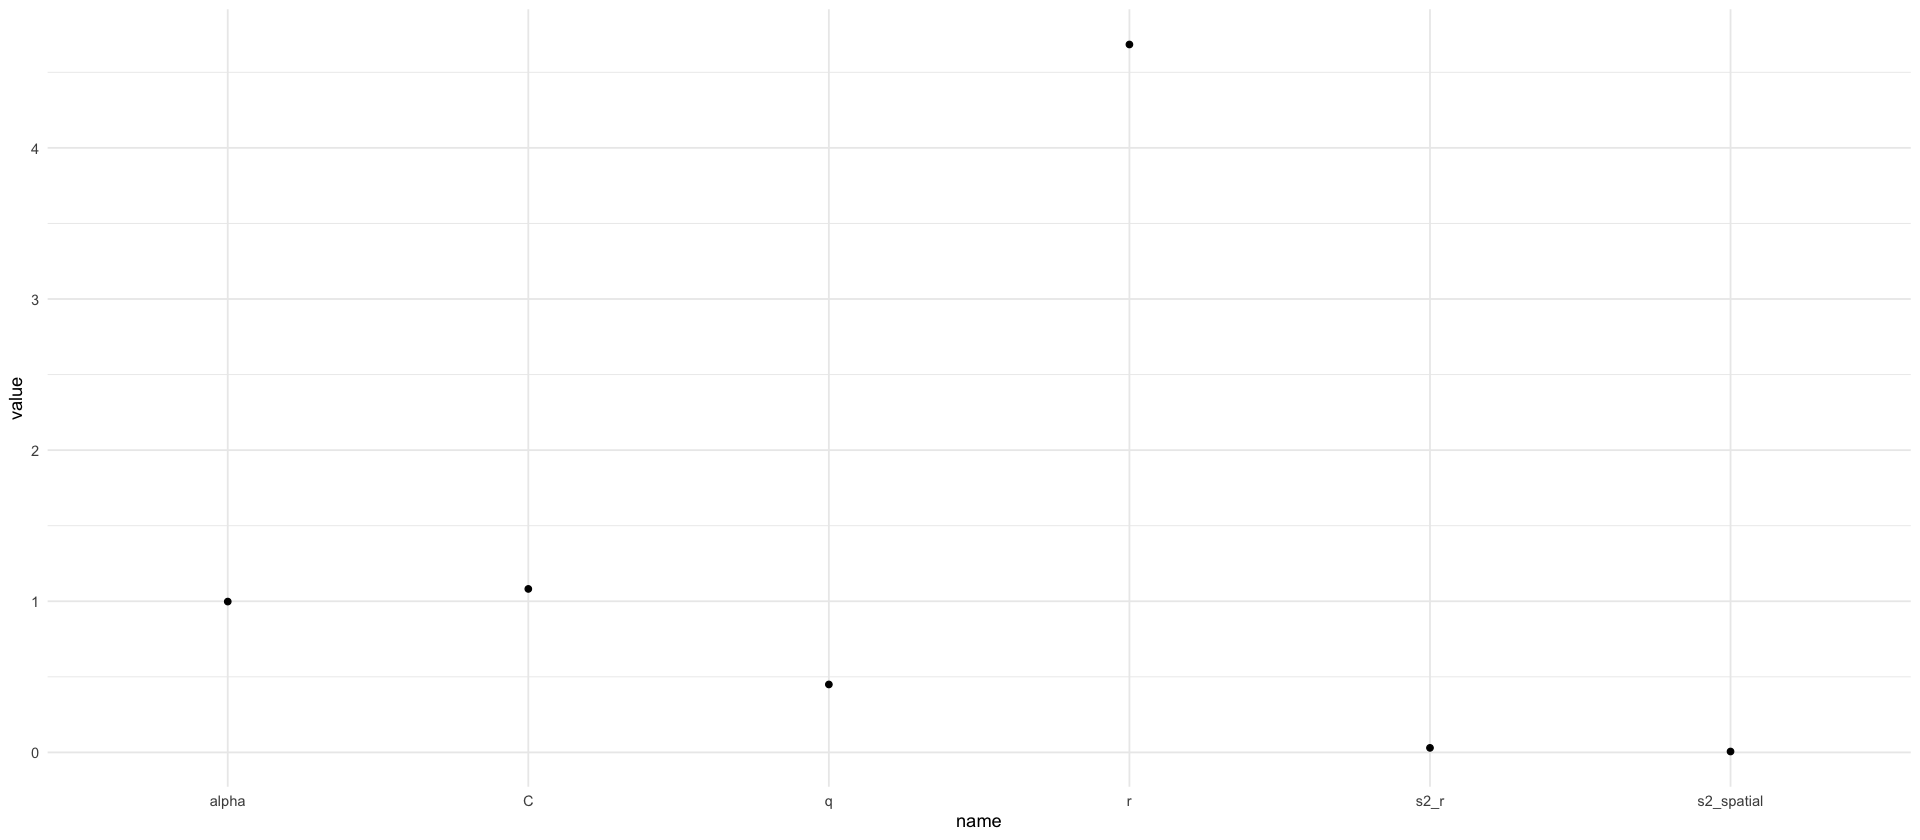

In [14]:
theta_to_params(theta) %>%
    enframe() %>%
    ggplot(aes(name, value)) +
    geom_point()


In [32]:
np <- import("numpy")
means <- np$array(predictions[[1]])
sds <- np$array(predictions[[2]])
quantiles <- np$array(predictions[[3]])

dim(quantiles)


[1]   23 4401

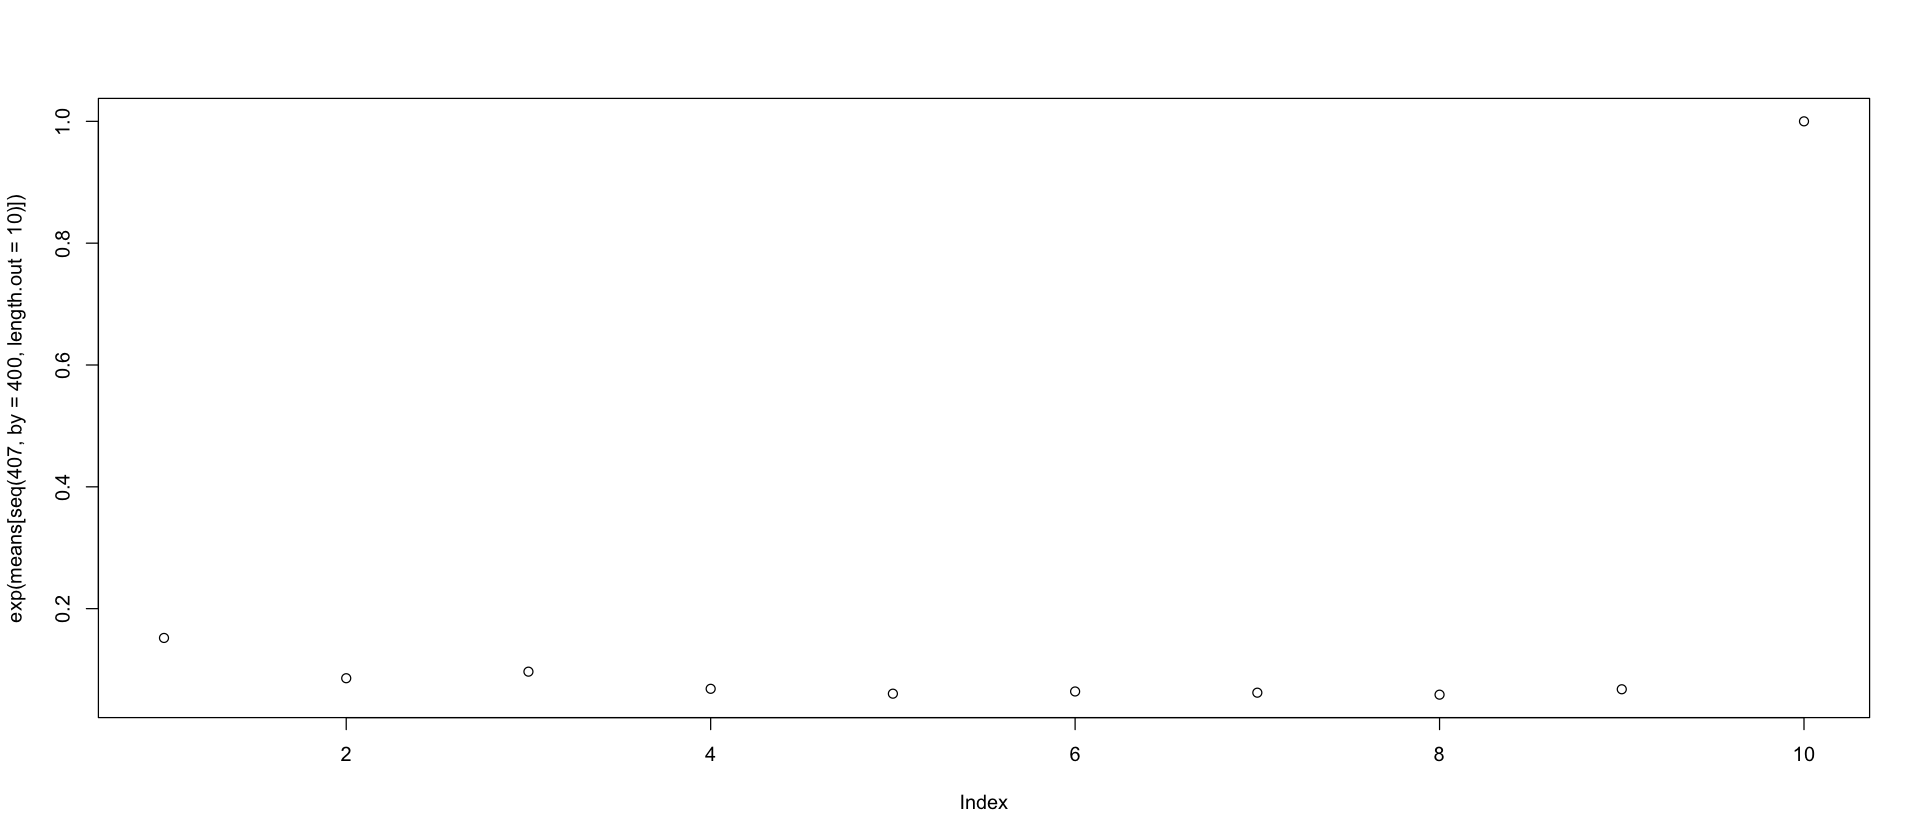

In [39]:
# plot(exp(means[402:412]))
plot(exp(means[seq(407, by = 400, length.out = 10)]))
